In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Tune_bdx\\Documents\\Advanced-Regression-Starter-Data\\df_train.csv')

In [3]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df.shape

(8763, 49)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [7]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [8]:
Barcelona_Data = df.filter(like='Barcelona', axis=1)
print (Barcelona_Data)

      Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_rain_1h  \
0                 6.333333           42.666667                0.0   
1                 4.000000          139.000000                0.0   
2                 2.000000          326.000000                0.0   
3                 2.333333          273.000000                0.0   
4                 4.333333          260.000000                0.0   
...                    ...                 ...                ...   
8758              1.666667           83.666667                0.0   
8759              3.000000          213.333333                0.0   
8760              5.333333          256.666667                0.0   
8761              5.333333          250.000000                0.0   
8762              4.333333          253.333333                0.0   

      Barcelona_pressure  Barcelona_rain_3h  Barcelona_weather_id  \
0            1036.333333                0.0                 800.0   
1            1037.333333         

In [9]:
Barcelona_Summary = Barcelona_Data.describe()
print (Barcelona_Summary)

       Barcelona_wind_speed  Barcelona_wind_deg  Barcelona_rain_1h  \
count           8763.000000         8763.000000        8763.000000   
mean               2.870497          190.544848           0.128906   
std                1.792197           89.077337           0.634730   
min                0.000000            0.000000           0.000000   
25%                1.666667          118.166667           0.000000   
50%                2.666667          200.000000           0.000000   
75%                4.000000          260.000000           0.000000   
max               12.666667          360.000000          12.000000   

       Barcelona_pressure  Barcelona_rain_3h  Barcelona_weather_id  \
count        8.763000e+03        8763.000000           8763.000000   
mean         1.377965e+03           0.000439            765.979687   
std          1.407314e+04           0.003994             88.142235   
min          6.706667e+02           0.000000            200.666667   
25%          1.0140

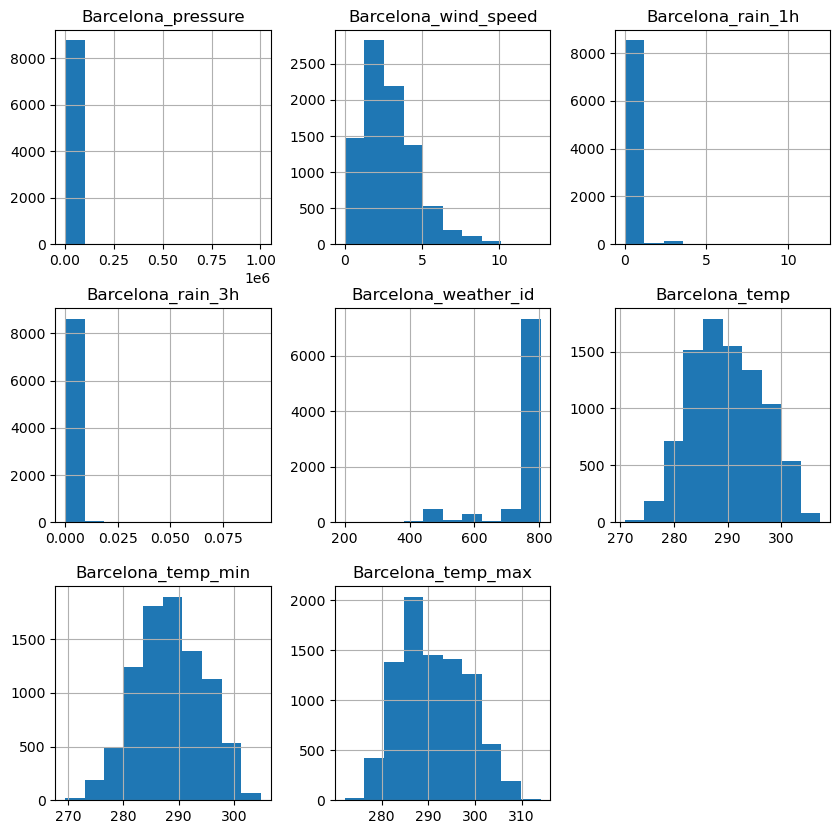

In [10]:
features = ['Barcelona_pressure', 'Barcelona_wind_speed', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_weather_id', 'Barcelona_temp','Barcelona_temp_min', 'Barcelona_temp_max'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

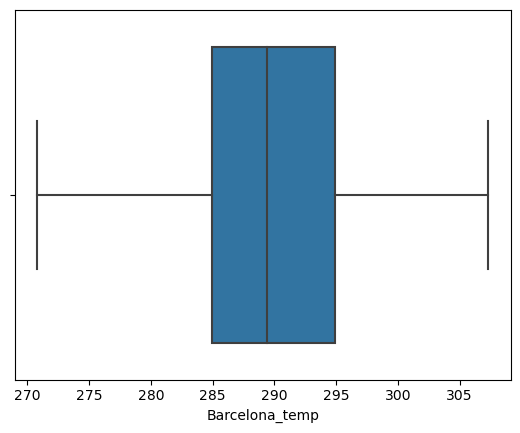

In [11]:
sns.boxplot(x='Barcelona_temp', data=df);

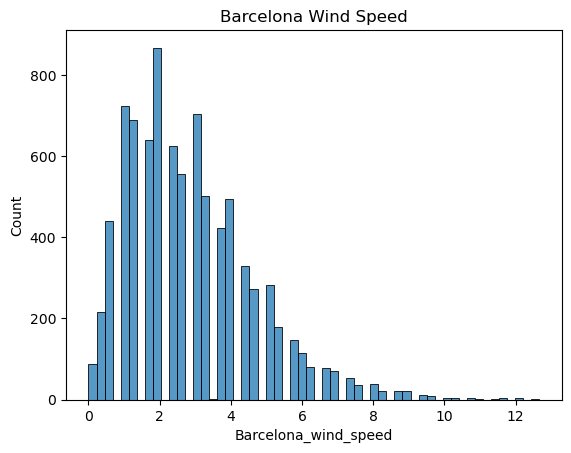

In [12]:
sns.histplot(x ='Barcelona_wind_speed', data = df, palette="hls")
plt.title("Barcelona Wind Speed");

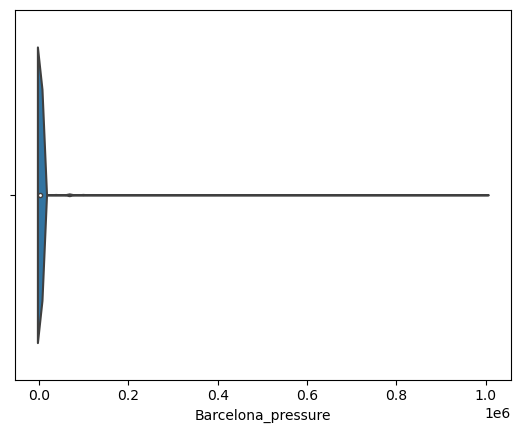

In [16]:
sns.violinplot(x='Barcelona_pressure', data=df);

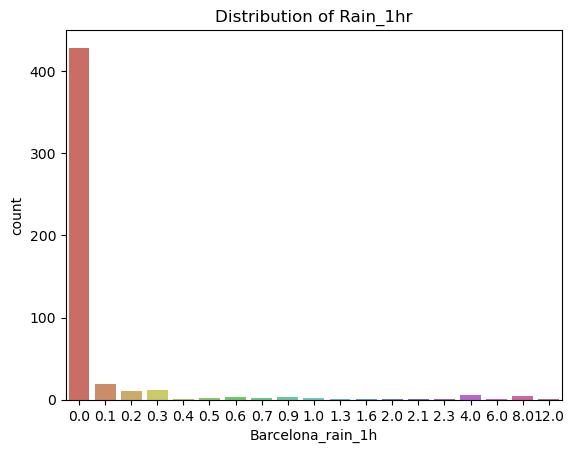

In [20]:
sns.countplot(x = 'Barcelona_rain_1h', data = df[:500], palette="hls")
plt.title("Distribution of Rain_1hr");

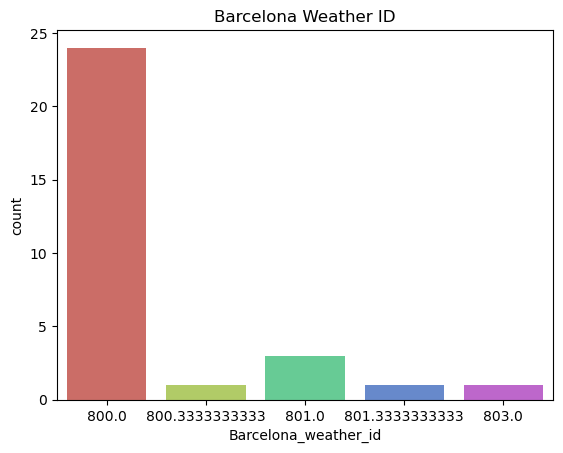

In [31]:
sns.countplot(x = 'Barcelona_weather_id', data = df[:30], palette="hls")
plt.title("Barcelona Weather ID");

In [32]:
# The columns for which to find correlation coefficients

columns_to_correlate = ['Barcelona_pressure', 'Barcelona_wind_speed', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_weather_id', 'Barcelona_temp','Barcelona_temp_min', 'Barcelona_temp_max']

# Calculate the correlation coefficients for the selected columns
correlation_matrix = df[columns_to_correlate].corr()

# Print the correlation coefficients
print("Correlation Coefficients for Barcelona Data:")
print(correlation_matrix)

Correlation Coefficients for Barcelona Data:
                      Barcelona_pressure  Barcelona_wind_speed  \
Barcelona_pressure              1.000000              0.001280   
Barcelona_wind_speed            0.001280              1.000000   
Barcelona_rain_1h               0.053550              0.042136   
Barcelona_rain_3h              -0.002796             -0.001722   
Barcelona_weather_id           -0.013790             -0.048004   
Barcelona_temp                 -0.033221              0.116240   
Barcelona_temp_min             -0.029612              0.109268   
Barcelona_temp_max             -0.034412              0.114497   

                      Barcelona_rain_1h  Barcelona_rain_3h  \
Barcelona_pressure             0.053550          -0.002796   
Barcelona_wind_speed           0.042136          -0.001722   
Barcelona_rain_1h              1.000000          -0.020084   
Barcelona_rain_3h             -0.020084           1.000000   
Barcelona_weather_id          -0.525751           

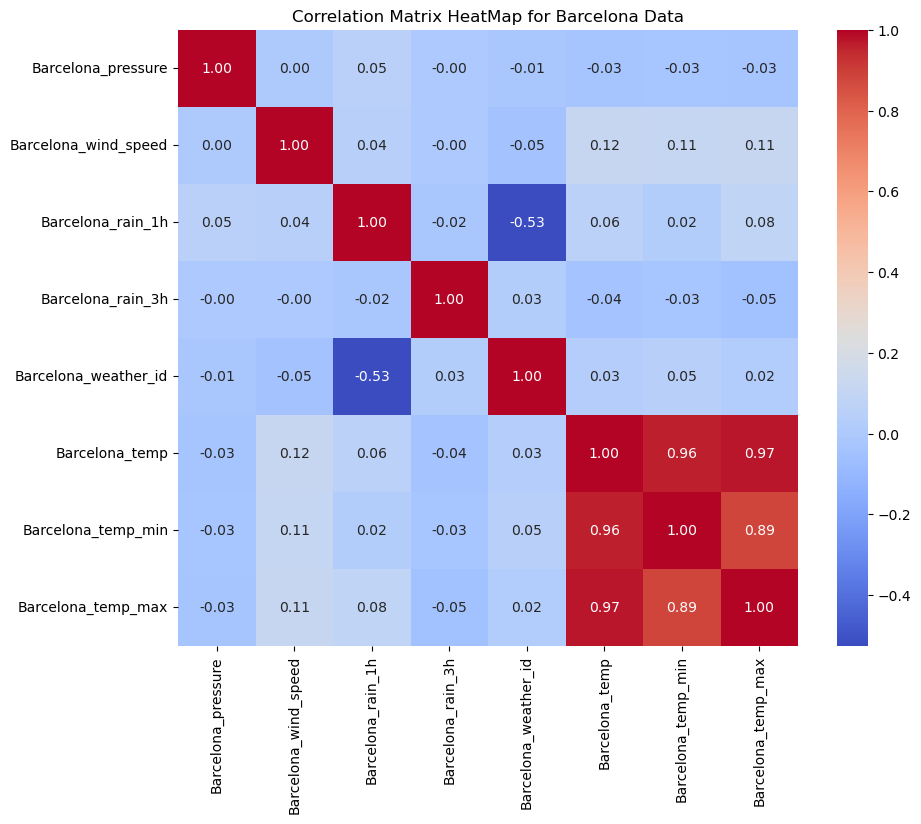

In [33]:
columns_to_correlate = ['Barcelona_pressure', 'Barcelona_wind_speed', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_weather_id', 'Barcelona_temp','Barcelona_temp_min', 'Barcelona_temp_max']

# Compute the correlation matrix
correlation_matrix = Barcelona_Data[columns_to_correlate].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix HeatMap for Barcelona Data')
plt.show()

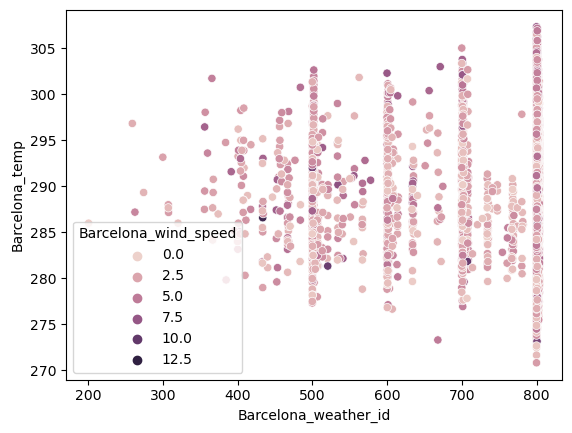

In [34]:
sns.scatterplot(x='Barcelona_weather_id',y='Barcelona_temp',hue='Barcelona_wind_speed', data=df);

In [ ]:
sns.jointplot(x = 'Barcelona_pressure', y = 'Barcelona_weather_id', data = df);